In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Data Exploration

initial data loading and feature types

In [2]:
ms_df = pd.read_csv("middleSchoolData.csv")
ms_df.head()

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0,24890.0,20.15,3.3,31.8,61.3,0.9,...,2.45,3.33,2.32,36.6,97.6,7.5,333.0,2.70,0.33,0.26
1,01M140,P.S. 140 NATHAN STRAUS,6,0,23536.0,24.56,5.7,12.4,78.7,0.5,...,4.11,3.12,3.26,31.0,87.3,9.7,371.0,2.71,0.31,0.24
2,01M184,P.S. 184M SHUANG WEN,67,23,16206.0,29.69,69.4,3.7,13.5,6.1,...,2.75,3.38,2.91,16.5,67.5,15.1,684.0,4.28,0.68,0.74
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0,21960.0,24.09,1.8,29.3,66.1,0.0,...,4.99,4.99,4.99,29.1,91.5,15.9,433.0,4.54,0.28,0.24
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0,25444.0,15.80,3.8,32.1,54.7,3.8,...,NaN,NaN,NaN,42.5,82.1,2.8,106.0,NaN,0.33,0.20


In [3]:
ms_df.shape

(594, 24)

In [4]:
ms_df.columns

Index(['dbn', 'school_name', 'applications', 'acceptances',
       'per_pupil_spending', 'avg_class_size', 'asian_percent',
       'black_percent', 'hispanic_percent', 'multiple_percent',
       'white_percent', 'rigorous_instruction', 'collaborative_teachers',
       'supportive_environment', 'effective_school_leadership',
       'strong_family_community_ties', 'trust', 'disability_percent',
       'poverty_percent', 'ESL_percent', 'school_size', 'student_achievement',
       'reading_scores_exceed', 'math_scores_exceed'],
      dtype='object')

In [5]:
ms_df.dtypes

dbn                              object
school_name                      object
applications                      int64
acceptances                       int64
per_pupil_spending              float64
avg_class_size                  float64
asian_percent                   float64
black_percent                   float64
hispanic_percent                float64
multiple_percent                float64
white_percent                   float64
rigorous_instruction            float64
collaborative_teachers          float64
supportive_environment          float64
effective_school_leadership     float64
strong_family_community_ties    float64
trust                           float64
disability_percent              float64
poverty_percent                 float64
ESL_percent                     float64
school_size                     float64
student_achievement             float64
reading_scores_exceed           float64
math_scores_exceed              float64
dtype: object

In [6]:
ms_df.describe()

,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,white_percent,rigorous_instruction,...,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
count,594.000000,594.000000,473.000000,473.000000,592.000000,592.000000,592.000000,592.000000,592.000000,551.000000,...,551.000000,549.000000,549.000000,592.000000,592.000000,592.000000,592.000000,547.000000,586.000000,586.000000
mean,42.675084,7.510101,20752.021142,21.927611,9.888345,34.411655,42.176182,2.167061,11.354730,3.653829,...,3.569891,3.543406,3.588087,21.337331,77.677365,11.571959,622.398649,3.402340,0.465973,0.416331
std,59.786894,21.146180,3900.259115,4.844182,15.055115,28.053603,25.802657,2.309272,17.495877,0.650584,...,0.608429,0.655486,0.585292,8.102065,18.885488,11.038138,375.354046,0.704331,0.189849,0.218728
min,0.000000,0.000000,13260.000000,6.970000,0.000000,0.000000,2.100000,0.000000,0.000000,1.860000,...,1.300000,1.490000,1.100000,0.000000,8.400000,0.000000,33.000000,1.410000,0.150000,0.150000
25%,11.000000,0.000000,18095.000000,18.410000,1.100000,9.775000,19.375000,0.800000,1.100000,3.240000,...,3.230000,3.150000,3.240000,16.100000,72.400000,3.875000,336.750000,2.920000,0.310000,0.220000
50%,23.000000,1.000000,20147.000000,22.050000,2.900000,26.200000,36.200000,1.400000,2.500000,3.660000,...,3.610000,3.620000,3.640000,20.750000,82.850000,8.700000,537.500000,3.410000,0.430000,0.370000
75%,42.000000,2.000000,22828.000000,25.140000,10.100000,59.300000,65.300000,2.600000,14.725000,4.130000,...,4.000000,4.000000,3.990000,25.825000,90.700000,15.900000,792.000000,3.940000,0.607500,0.580000
max,394.000000,205.000000,53217.000000,39.000000,81.400000,96.000000,100.000000,18.700000,85.100000,4.940000,...,4.990000,4.990000,4.990000,100.000000,99.400000,100.000000,2238.000000,4.990000,0.900000,0.900000


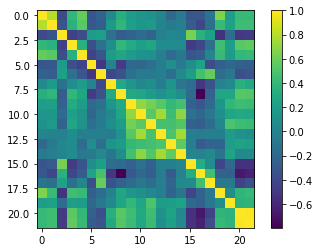

In [7]:
plt.imshow(ms_df.corr()) 
plt.colorbar()

<h1>Q1: Finding the correlation between number of applications & number of admissions <h1>

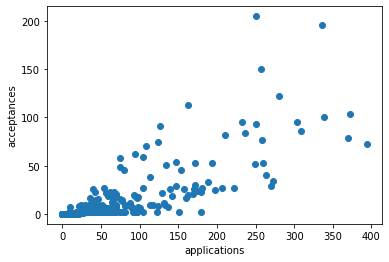

In [8]:
plt.scatter(ms_df['applications'], ms_df['acceptances'])
plt.xlabel('applications')
plt.ylabel('acceptances')
plt.show()

In [9]:
p = ms_df.loc[:, "applications"].corr(ms_df.loc[:, "acceptances"], method='pearson')
p

0.8017265370719311

We see that the correlation coefficient between the raw number of applications and the number of acceptances is 0.8

<h1> Q2: Finding correlation between application rate & acceptances, then comparing to previous correlation from Q1 

In [10]:
ms_df["application_rate"] = ms_df['applications'] / ms_df["school_size"]
ms_df.head()

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,application_rate
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0,24890.0,20.15,3.3,31.8,61.3,0.9,...,3.33,2.32,36.6,97.6,7.5,333.0,2.70,0.33,0.26,0.018018
1,01M140,P.S. 140 NATHAN STRAUS,6,0,23536.0,24.56,5.7,12.4,78.7,0.5,...,3.12,3.26,31.0,87.3,9.7,371.0,2.71,0.31,0.24,0.016173
2,01M184,P.S. 184M SHUANG WEN,67,23,16206.0,29.69,69.4,3.7,13.5,6.1,...,3.38,2.91,16.5,67.5,15.1,684.0,4.28,0.68,0.74,0.097953
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0,21960.0,24.09,1.8,29.3,66.1,0.0,...,4.99,4.99,29.1,91.5,15.9,433.0,4.54,0.28,0.24,0.000000
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0,25444.0,15.80,3.8,32.1,54.7,3.8,...,NaN,NaN,42.5,82.1,2.8,106.0,NaN,0.33,0.20,0.103774


In [11]:
ms_df2 = ms_df.dropna(subset=["acceptances", 'application_rate'])

In [12]:
# We build the regression model predicting star wars 2 ratings from star wars 1 ratings

from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error

X = ms_df2["application_rate"].values.reshape(-1,1)
y =  ms_df2["acceptances"].values.reshape(-1,1)
regressor = linear_model.LinearRegression()
regressor.fit(X,y)
y_pred = regressor.predict(X)


#%%
import statsmodels.api as sm
from math import sqrt
# We return betas, R^2 and RMSE
r2 = r2_score(y, y_pred)
print(r2)
rmse = mean_squared_error(y, y_pred)
print(sqrt(rmse))
print(regressor.coef_)

0.43395255444666947
15.911809338631706
[[248.46728596]]


In [13]:
from statsmodels.formula.api import ols
model = ols("acceptances ~ applications", data=ms_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            acceptances   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1065.
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          1.93e-134
Time:                        10:57:29   Log-Likelihood:                -2349.2
No. Observations:                 594   AIC:                             4702.
Df Residuals:                     592   BIC:                             4711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.5910      0.638     -7.198   

In [14]:
from statsmodels.tools.eval_measures import  rmse
r = rmse(ms_df['acceptances'], ms_df["applications"])
print(r)

56.81252766479678


In [15]:
from statsmodels.formula.api import ols
model = ols("acceptances ~ application_rate", data=ms_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            acceptances   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     452.3
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           6.14e-75
Time:                        10:57:29   Log-Likelihood:                -2478.1
No. Observations:                 592   AIC:                             4960.
Df Residuals:                     590   BIC:                             4969.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.9894      0.979  

In [16]:
from statsmodels.tools.eval_measures import  rmse
r = rmse(ms_df2['acceptances'], ms_df2["application_rate"])
print(r)

22.380159118285814


In [17]:
ms_df.iloc[:, 2:] = ms_df.iloc[:,2:].apply(pd.to_numeric,errors='coerce')

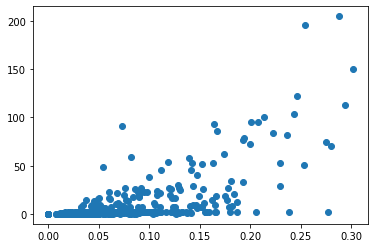

In [18]:
plt.scatter(ms_df['application_rate'], ms_df['acceptances'])
plt.show()

In [19]:
p = ms_df.loc[:, "application_rate"].corr(ms_df.loc[:, "acceptances"])
p

0.6587507529002681

We see we have explained less variance with application rate vs acceptances to schools

<h1> Q3: Finding what school as the best odds per student of being accepted to HSPHS

We want to find the school with the highest acceptance-to-student ratio

In [20]:
ms_df["acceptance_student_ratio"] = ms_df['acceptances'] / ms_df["school_size"]
ms_df["acceptance_rate"] = ms_df['acceptances'] / ms_df["applications"]

ms_df.head()

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,application_rate,acceptance_student_ratio,acceptance_rate
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0,24890.0,20.15,3.3,31.8,61.3,0.9,...,36.6,97.6,7.5,333.0,2.70,0.33,0.26,0.018018,0.000000,0.000000
1,01M140,P.S. 140 NATHAN STRAUS,6,0,23536.0,24.56,5.7,12.4,78.7,0.5,...,31.0,87.3,9.7,371.0,2.71,0.31,0.24,0.016173,0.000000,0.000000
2,01M184,P.S. 184M SHUANG WEN,67,23,16206.0,29.69,69.4,3.7,13.5,6.1,...,16.5,67.5,15.1,684.0,4.28,0.68,0.74,0.097953,0.033626,0.343284
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0,21960.0,24.09,1.8,29.3,66.1,0.0,...,29.1,91.5,15.9,433.0,4.54,0.28,0.24,0.000000,0.000000,NaN
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0,25444.0,15.80,3.8,32.1,54.7,3.8,...,42.5,82.1,2.8,106.0,NaN,0.33,0.20,0.103774,0.000000,0.000000


In [21]:
ind = ms_df["acceptance_student_ratio"].argmax()
ms_df.iloc[ind, 1]

'THE CHRISTA MCAULIFFE SCHOOL\\I.S. 187'

In [22]:
ms_df[ms_df["school_name"] == 'THE CHRISTA MCAULIFFE SCHOOL\\I.S. 187']

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,application_rate,acceptance_student_ratio,acceptance_rate
304,20K187,THE CHRISTA MCAULIFFE SCHOOL\I.S. 187,251,205,17403.0,27.71,67.5,1.3,6.8,0.6,...,11.3,65.8,3.3,873.0,4.36,0.9,0.9,0.287514,0.234822,0.816733


# Pre Q4: PCA Setup

In [23]:
zscoredData = ms_df.drop(['application_rate', 'acceptance_rate'], axis=1).iloc[:, 2:].apply(stats.zscore, axis=0, nan_policy='omit')
# drop all the columns we created
zscoredData

,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,white_percent,rigorous_instruction,...,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,acceptance_student_ratio
0,-0.613947,-0.355451,1.062073,-0.367346,-0.437985,-0.093174,0.741784,-0.549148,-0.495091,-2.482840,...,-0.325866,-2.168565,1.885393,1.055810,-0.369211,-0.771654,-0.998086,-0.716828,-0.715340,-0.382451
1,-0.613947,-0.355451,0.714549,0.543988,-0.278436,-0.785292,1.416703,-0.722509,-0.495091,-0.375126,...,-0.646532,-0.561064,1.193627,0.509956,-0.169734,-0.670330,-0.983875,-0.822265,-0.806856,-0.382451
2,0.407203,0.733133,-1.166803,1.604112,3.956262,-1.095675,-1.112305,1.704548,-0.231949,-1.036671,...,-0.249518,-1.159602,-0.597554,-0.539354,0.319893,0.164254,1.247230,1.128320,1.481046,1.048815
3,-0.714388,-0.355451,0.310046,0.446862,-0.537703,-0.182364,0.927968,-0.939211,-0.489370,0.332574,...,2.208916,2.397420,0.958920,0.732537,0.392430,-0.505013,1.616713,-0.980420,-0.806856,-0.382451
4,-0.530246,-0.355451,1.204265,-1.266282,-0.404746,-0.082471,0.485780,0.707721,-0.323477,NaN,...,NaN,NaN,2.614218,0.234380,-0.795368,-1.376928,NaN,-0.716828,-0.989889,-0.382451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.379585,-0.308121,NaN,NaN,-0.384802,0.841542,-0.433507,-0.375787,-0.329197,-1.190519,...,-0.249518,-0.133538,-1.783439,-0.661244,-0.967644,-0.808983,-0.131223,-0.716828,-0.395034,-0.249020
590,-0.346104,-0.308121,NaN,NaN,-0.637421,0.474078,0.322868,-0.592488,-0.609500,0.255650,...,0.315464,0.122978,-1.128732,0.276776,-0.342010,0.246913,1.318285,0.442979,0.657401,-0.322920
591,-0.329364,-0.308121,NaN,NaN,-0.644069,0.245750,0.555599,-0.332447,-0.615221,-0.236663,...,-2.127700,-0.903086,-0.474024,0.515256,-0.069995,1.204152,-0.600182,0.706572,0.886191,-0.342820
592,-0.312624,-0.308121,NaN,NaN,-0.630774,1.016356,-0.293869,-0.375787,-0.609500,NaN,...,NaN,NaN,-1.548733,0.075393,-0.033726,0.153588,-0.756501,1.181038,1.435288,-0.319856


In [24]:
# drop race, explained in the paper
zscoredData = zscoredData.drop(['asian_percent', 'white_percent', 'black_percent', 'hispanic_percent', 'multiple_percent'], axis=1)
zscoredData

,applications,acceptances,per_pupil_spending,avg_class_size,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,acceptance_student_ratio
0,-0.613947,-0.355451,1.062073,-0.367346,-2.482840,-1.923160,-2.015029,-1.842299,-0.325866,-2.168565,1.885393,1.055810,-0.369211,-0.771654,-0.998086,-0.716828,-0.715340,-0.382451
1,-0.613947,-0.355451,0.714549,0.543988,-0.375126,-0.649511,-1.667125,0.888517,-0.646532,-0.561064,1.193627,0.509956,-0.169734,-0.670330,-0.983875,-0.822265,-0.806856,-0.382451
2,0.407203,0.733133,-1.166803,1.604112,-1.036671,-1.084050,0.385503,-1.348778,-0.249518,-1.159602,-0.597554,-0.539354,0.319893,0.164254,1.247230,1.128320,1.481046,1.048815
3,-0.714388,-0.355451,0.310046,0.446862,0.332574,0.848900,0.576850,2.336178,2.208916,2.397420,0.958920,0.732537,0.392430,-0.505013,1.616713,-0.980420,-0.806856,-0.382451
4,-0.530246,-0.355451,1.204265,-1.266282,NaN,NaN,NaN,NaN,NaN,NaN,2.614218,0.234380,-0.795368,-1.376928,NaN,-0.716828,-0.989889,-0.382451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.379585,-0.308121,NaN,NaN,-1.190519,-0.649511,-1.110480,-0.312384,-0.249518,-0.133538,-1.783439,-0.661244,-0.967644,-0.808983,-0.131223,-0.716828,-0.395034,-0.249020
590,-0.346104,-0.308121,NaN,NaN,0.255650,-0.529638,0.733406,-0.016272,0.315464,0.122978,-1.128732,0.276776,-0.342010,0.246913,1.318285,0.442979,0.657401,-0.322920
591,-0.329364,-0.308121,NaN,NaN,-0.236663,-0.095099,0.750802,-0.921060,-2.127700,-0.903086,-0.474024,0.515256,-0.069995,1.204152,-0.600182,0.706572,0.886191,-0.342820
592,-0.312624,-0.308121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.548733,0.075393,-0.033726,0.153588,-0.756501,1.181038,1.435288,-0.319856


In [25]:
zscoredData.describe()

,applications,acceptances,per_pupil_spending,avg_class_size,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,acceptance_student_ratio
count,594.000000,5.940000e+02,4.730000e+02,4.730000e+02,5.510000e+02,5.510000e+02,5.510000e+02,5.510000e+02,5.490000e+02,5.490000e+02,5.920000e+02,5.920000e+02,5.920000e+02,592.000000,5.470000e+02,5.860000e+02,5.860000e+02,5.920000e+02
mean,0.000000,-4.784800e-17,-1.502205e-16,-1.802645e-16,7.092532e-17,-5.996413e-16,-5.609548e-16,2.901490e-17,3.041485e-16,-3.365048e-16,-1.440289e-16,-3.000603e-16,-8.401688e-17,0.000000,-1.104134e-16,4.850121e-17,-2.425061e-17,-2.400482e-17
std,1.000843,1.000843e+00,1.001059e+00,1.001059e+00,1.000909e+00,1.000909e+00,1.000909e+00,1.000909e+00,1.000912e+00,1.000912e+00,1.000846e+00,1.000846e+00,1.000846e+00,1.000846,1.000915e+00,1.000854e+00,1.000854e+00,1.000846e+00
min,-0.714388,-3.554510e-01,-1.922937e+00,-3.091017e+00,-2.759766e+00,-4.020935e+00,-3.302270e+00,-3.734130e+00,-3.135505e+00,-4.254894e+00,-2.635794e+00,-3.671388e+00,-1.049248e+00,-1.571575,-2.831287e+00,-1.665761e+00,-1.218679e+00,-3.824514e-01
25%,-0.530246,-3.554510e-01,-6.819635e-01,-7.269206e-01,-6.366673e-01,-6.195425e-01,-6.842990e-01,-5.591446e-01,-6.007224e-01,-5.952666e-01,-6.469659e-01,-2.796765e-01,-6.978956e-01,-0.761655,-6.854468e-01,-8.222647e-01,-8.983725e-01,-3.824514e-01
50%,-0.329364,-3.081213e-01,-1.552876e-01,2.529191e-02,9.493329e-03,6.972640e-02,8.978554e-02,6.598193e-02,1.169570e-01,8.877602e-02,-7.255283e-02,2.741263e-01,-2.604052e-01,-0.226374,1.088547e-02,-1.896427e-01,-2.120019e-01,-2.848820e-01
75%,-0.011301,-2.607915e-01,5.328305e-01,6.638459e-01,7.325778e-01,7.589953e-01,7.681967e-01,7.075592e-01,6.972085e-01,6.873133e-01,5.543604e-01,6.901409e-01,3.924304e-01,0.452226,7.640612e-01,7.461108e-01,7.489170e-01,-1.333433e-01
max,5.881239,9.347142e+00,8.332613e+00,3.528040e+00,1.978745e+00,1.867819e+00,2.281575e+00,2.336178e+00,2.208916e+00,2.397420e+00,9.717176e+00,1.151202e+00,8.017912e+00,4.307846,2.256202e+00,2.288127e+00,2.213174e+00,9.612679e+00


In [26]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(zscoredData.iloc[:,:])

SimpleImputer()

In [27]:
zscoredData.iloc[:,:] = pd.DataFrame(imp_mean.transform(zscoredData.iloc[:,:]))
zscoredData

,applications,acceptances,per_pupil_spending,avg_class_size,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,acceptance_student_ratio
0,-0.613947,-0.355451,1.062073e+00,-3.673465e-01,-2.482840e+00,-1.923160e+00,-2.015029e+00,-1.842299e+00,-3.258665e-01,-2.168565e+00,1.885393,1.055810,-0.369211,-0.771654,-9.980857e-01,-0.716828,-0.715340,-0.382451
1,-0.613947,-0.355451,7.145490e-01,5.439879e-01,-3.751261e-01,-6.495107e-01,-1.667125e+00,8.885169e-01,-6.465317e-01,-5.610645e-01,1.193627,0.509956,-0.169734,-0.670330,-9.838749e-01,-0.822265,-0.806856,-0.382451
2,0.407203,0.733133,-1.166803e+00,1.604112e+00,-1.036671e+00,-1.084050e+00,3.855032e-01,-1.348778e+00,-2.495176e-01,-1.159602e+00,-0.597554,-0.539354,0.319893,0.164254,1.247230e+00,1.128320,1.481046,1.048815
3,-0.714388,-0.355451,3.100455e-01,4.468616e-01,3.325736e-01,8.488999e-01,5.768500e-01,2.336178e+00,2.208916e+00,2.397420e+00,0.958920,0.732537,0.392430,-0.505013,1.616713e+00,-0.980420,-0.806856,-0.382451
4,-0.530246,-0.355451,1.204265e+00,-1.266282e+00,7.092532e-17,-5.996413e-16,-5.609548e-16,2.901490e-17,3.041485e-16,-3.365048e-16,2.614218,0.234380,-0.795368,-1.376928,-1.104134e-16,-0.716828,-0.989889,-0.382451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.379585,-0.308121,-1.502205e-16,-1.802645e-16,-1.190519e+00,-6.495107e-01,-1.110480e+00,-3.123841e-01,-2.495176e-01,-1.335378e-01,-1.783439,-0.661244,-0.967644,-0.808983,-1.312232e-01,-0.716828,-0.395034,-0.249020
590,-0.346104,-0.308121,-1.502205e-16,-1.802645e-16,2.556498e-01,-5.296378e-01,7.334064e-01,-1.627156e-02,3.154641e-01,1.229782e-01,-1.128732,0.276776,-0.342010,0.246913,1.318285e+00,0.442979,0.657401,-0.322920
591,-0.329364,-0.308121,-1.502205e-16,-1.802645e-16,-2.366631e-01,-9.509876e-02,7.508015e-01,-9.210600e-01,-2.127700e+00,-9.030858e-01,-0.474024,0.515256,-0.069995,1.204152,-6.001816e-01,0.706572,0.886191,-0.342820
592,-0.312624,-0.308121,-1.502205e-16,-1.802645e-16,7.092532e-17,-5.996413e-16,-5.609548e-16,2.901490e-17,3.041485e-16,-3.365048e-16,-1.548733,0.075393,-0.033726,0.153588,-7.565011e-01,1.181038,1.435288,-0.319856


In [28]:
zscoredData.describe()

,applications,acceptances,per_pupil_spending,avg_class_size,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,acceptance_student_ratio
count,594.000000,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,594.000000,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02
mean,0.000000,-4.784800e-17,-1.555060e-16,-1.794300e-16,6.579099e-17,-6.010904e-16,-5.801569e-16,2.691450e-17,3.050310e-16,-3.289550e-16,-1.435440e-16,-2.990500e-16,-8.373399e-17,0.000000,-1.136390e-16,4.784800e-17,-2.392400e-17,-2.392400e-17
std,1.000843,1.000843e+00,8.931064e-01,8.931064e-01,9.639366e-01,9.639366e-01,9.639366e-01,9.639366e-01,9.621855e-01,9.621855e-01,9.991565e-01,9.991565e-01,9.991565e-01,0.999156,9.604313e-01,9.940803e-01,9.940803e-01,9.991565e-01
min,-0.714388,-3.554510e-01,-1.922937e+00,-3.091017e+00,-2.759766e+00,-4.020935e+00,-3.302270e+00,-3.734130e+00,-3.135505e+00,-4.254894e+00,-2.635794e+00,-3.671388e+00,-1.049248e+00,-1.571575,-2.831287e+00,-1.665761e+00,-1.218679e+00,-3.824514e-01
25%,-0.530246,-3.554510e-01,-4.985766e-01,-5.016701e-01,-5.443586e-01,-5.446219e-01,-5.886256e-01,-4.892292e-01,-5.663654e-01,-5.439634e-01,-6.469659e-01,-2.770268e-01,-6.956288e-01,-0.759655,-6.286033e-01,-8.222647e-01,-8.983725e-01,-3.824514e-01
50%,-0.329364,-3.081213e-01,-1.502205e-16,-1.802645e-16,7.092532e-17,-5.996413e-16,-5.609548e-16,2.901490e-17,3.297326e-02,2.037176e-02,-6.637635e-02,2.661770e-01,-2.558716e-01,-0.223708,-1.104134e-16,-1.369242e-01,-2.120019e-01,-2.847701e-01
75%,-0.011301,-2.607915e-01,3.210821e-01,4.463449e-01,6.710387e-01,7.140430e-01,7.334064e-01,6.253057e-01,6.666689e-01,6.189090e-01,5.512721e-01,6.888160e-01,3.901636e-01,0.450893,7.072177e-01,7.065719e-01,7.489170e-01,-1.300292e-01
max,5.881239,9.347142e+00,8.332613e+00,3.528040e+00,1.978745e+00,1.867819e+00,2.281575e+00,2.336178e+00,2.208916e+00,2.397420e+00,9.717176e+00,1.151202e+00,8.017912e+00,4.307846,2.256202e+00,2.288127e+00,2.213174e+00,9.612679e+00


In [29]:
zscoredData.columns

Index(['applications', 'acceptances', 'per_pupil_spending', 'avg_class_size',
       'rigorous_instruction', 'collaborative_teachers',
       'supportive_environment', 'effective_school_leadership',
       'strong_family_community_ties', 'trust', 'disability_percent',
       'poverty_percent', 'ESL_percent', 'school_size', 'student_achievement',
       'reading_scores_exceed', 'math_scores_exceed',
       'acceptance_student_ratio'],
      dtype='object')

<h1> Q4 relation between perceived school quality and measures of achievement <h1>

In [30]:
pca = PCA()
pca.fit(zscoredData.iloc[:, 4:10])

PCA()

In [31]:
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData1 = pca.fit_transform(zscoredData.iloc[:,4:10])
covarExplained = eigVals/sum(eigVals)*100

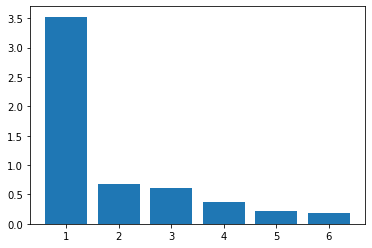

In [32]:
plt.bar(np.linspace(1,6, 6),eigVals)
plt.show()

In [33]:
#rotatedData1[:,0]

In [34]:
rotatedData1[:,0] = [-x for x in rotatedData1[:,0]]
#rotatedData1[:,0]

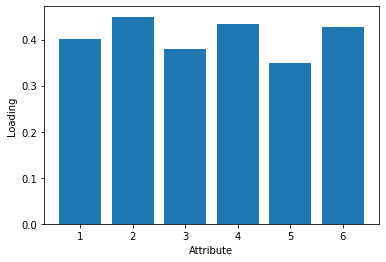

In [35]:
whichPrincipalComponent = 0
loadings[0] = [-x for x in loadings[0]]
plt.bar(np.linspace(1,6,6),loadings[0,:])
plt.xlabel('Attribute')
plt.ylabel('Loading')
plt.show()

In [36]:
pca = PCA()
pca.fit(zscoredData.iloc[:, 14:17])

PCA()

In [37]:
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData2 = pca.fit_transform(zscoredData.iloc[:,14:17])
covarExplained = eigVals/sum(eigVals)*100

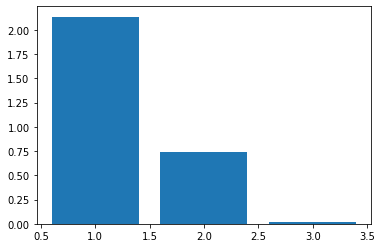

In [38]:
plt.bar(np.linspace(1,3, 3),eigVals)
plt.show()

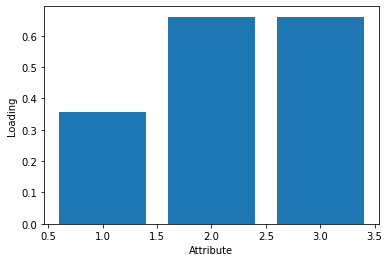

In [39]:
whichPrincipalComponent = 0
plt.bar(np.linspace(1,3,3),loadings[0,:])
plt.xlabel('Attribute')
plt.ylabel('Loading')
plt.show()

Text(0, 0.5, 'Objective Achievement')

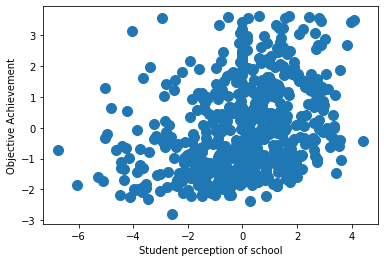

In [40]:
plt.plot(rotatedData1[:,0],rotatedData2[:,0],'o',markersize=10)
plt.xlabel('Student perception of school')
plt.ylabel('Objective Achievement')

In [41]:
p = np.corrcoef(rotatedData1[:,0], rotatedData2[:,0])
p

array([[1.        , 0.34894756],
       [0.34894756, 1.        ]])

<h1> Q5 Testing hypothesis charter vs non charter school student achievement <h1>

In [42]:
from scipy import stats
non_charter = ms_df.iloc[0:594-109, :]
charter = ms_df.iloc[594-109:, :]

In [43]:
charter.head()

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,application_rate,acceptance_student_ratio,acceptance_rate
485,84K333,EXPLORE EXCEED CHARTER SCHOOL,38,2,NaN,NaN,2.8,72.9,22.2,2.0,...,23.6,77.8,7.9,505.0,4.44,0.43,0.40,0.075248,0.003960,0.052632
486,84K355,WILLIAMSBURG COLLEGIATE CHARTER SCHOOL,22,1,NaN,NaN,0.3,27.2,71.2,0.0,...,21.7,83.9,6.8,323.0,NaN,0.62,0.64,0.068111,0.003096,0.045455
487,84K356,ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL,49,2,NaN,NaN,0.3,94.6,3.8,0.9,...,16.2,75.1,0.2,1063.0,3.88,0.52,0.49,0.046096,0.001881,0.040816
488,84K357,KIPP AMP CHARTER SCHOOL,35,2,NaN,NaN,1.6,86.0,9.6,2.4,...,16.8,84.1,1.9,900.0,NaN,0.65,0.72,0.038889,0.002222,0.057143
489,84K358,ACHIEVEMENT FIRST EAST NEW YORK CHARTER SCHOOL,25,2,NaN,NaN,0.7,75.5,21.5,1.7,...,12.7,83.5,1.9,873.0,3.08,0.37,0.28,0.028637,0.002291,0.080000


In [44]:
non_charter.head()

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,application_rate,acceptance_student_ratio,acceptance_rate
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0,24890.0,20.15,3.3,31.8,61.3,0.9,...,36.6,97.6,7.5,333.0,2.70,0.33,0.26,0.018018,0.000000,0.000000
1,01M140,P.S. 140 NATHAN STRAUS,6,0,23536.0,24.56,5.7,12.4,78.7,0.5,...,31.0,87.3,9.7,371.0,2.71,0.31,0.24,0.016173,0.000000,0.000000
2,01M184,P.S. 184M SHUANG WEN,67,23,16206.0,29.69,69.4,3.7,13.5,6.1,...,16.5,67.5,15.1,684.0,4.28,0.68,0.74,0.097953,0.033626,0.343284
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0,21960.0,24.09,1.8,29.3,66.1,0.0,...,29.1,91.5,15.9,433.0,4.54,0.28,0.24,0.000000,0.000000,NaN
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0,25444.0,15.80,3.8,32.1,54.7,3.8,...,42.5,82.1,2.8,106.0,NaN,0.33,0.20,0.103774,0.000000,0.000000


In [45]:
stats.ks_2samp(charter['student_achievement'], non_charter['student_achievement'], alternative='less')

KstestResult(statistic=0.3599546013430436, pvalue=4.218435765747638e-11)

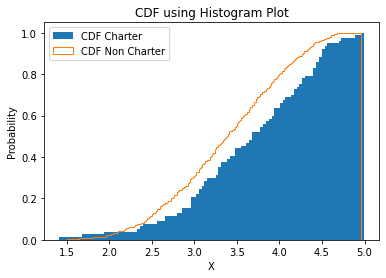

In [46]:
plt.hist(charter['student_achievement'],bins=109,density=True, cumulative=True, label= 'CDF Charter')
plt.hist(non_charter['student_achievement'],bins=400, density=True, cumulative=True, label='CDF Non Charter', histtype='step')
plt.xlabel("X")
plt.ylabel("Probability")
plt.title("CDF using Histogram Plot")
plt.legend()
plt.show()

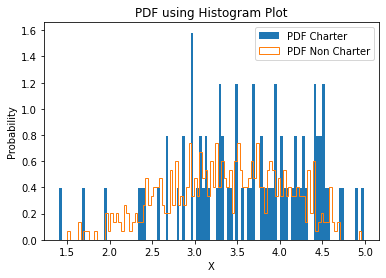

In [47]:
plt.hist(charter['student_achievement'],bins=109,density=True, label= 'PDF Charter')
plt.hist(non_charter['student_achievement'],bins=109, density=True, label='PDF Non Charter', histtype='step')
plt.xlabel("X")
plt.ylabel("Probability")
plt.title("PDF using Histogram Plot")
plt.legend()
plt.show()

In [48]:
non_charter['student_achievement'].describe()

count    470.000000
mean       3.365191
std        0.688032
min        1.500000
25%        2.872500
50%        3.395000
75%        3.900000
max        4.960000
Name: student_achievement, dtype: float64

In [49]:
charter['student_achievement'].describe()

count    77.000000
mean      3.629091
std       0.762912
min       1.410000
25%       3.100000
50%       3.700000
75%       4.250000
max       4.990000
Name: student_achievement, dtype: float64

<h1> Q6 impact of material spending <h1>

In [50]:
# 2 multiple regresisons
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("student_achievement ~ per_pupil_spending + avg_class_size", data=zscoredData).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     student_achievement   R-squared:                       0.038
Model:                             OLS   Adj. R-squared:                  0.035
Method:                  Least Squares   F-statistic:                     11.60
Date:                 Thu, 22 Jul 2021   Prob (F-statistic):           1.14e-05
Time:                         10:57:33   Log-Likelihood:                -806.93
No. Observations:                  594   AIC:                             1620.
Df Residuals:                      591   BIC:                             1633.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.168e

Text(0, 0.5, 'student achievement (SD)')

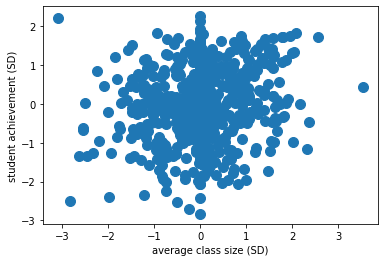

In [51]:
plt.plot(zscoredData['avg_class_size'],zscoredData['student_achievement'],'o',markersize=10)
plt.xlabel('average class size (SD)')
plt.ylabel('student achievement (SD)')

In [52]:
p = np.corrcoef(zscoredData['student_achievement'], zscoredData['avg_class_size'])
p

array([[1.        , 0.18431364],
       [0.18431364, 1.        ]])

In [53]:
model = ols("student_achievement ~ avg_class_size", data=zscoredData).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     student_achievement   R-squared:                       0.034
Model:                             OLS   Adj. R-squared:                  0.032
Method:                  Least Squares   F-statistic:                     20.82
Date:                 Thu, 22 Jul 2021   Prob (F-statistic):           6.14e-06
Time:                         10:57:33   Log-Likelihood:                -808.10
No. Observations:                  594   AIC:                             1620.
Df Residuals:                      592   BIC:                             1629.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.168e-16      0.0

Text(0, 0.5, 'student achievement')

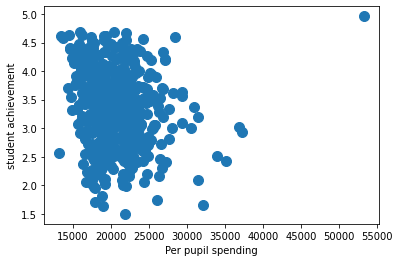

In [54]:
plt.plot(ms_df['per_pupil_spending'],ms_df['student_achievement'],'o',markersize=10)
plt.xlabel('Per pupil spending')
plt.ylabel('student achievement')

In [55]:
p = np.corrcoef(zscoredData['student_achievement'], zscoredData['per_pupil_spending'])
p

array([[ 1.        , -0.13936006],
       [-0.13936006,  1.        ]])

In [56]:
model = ols("acceptance_student_ratio ~ per_pupil_spending + avg_class_size", data=ms_df).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     acceptance_student_ratio   R-squared:                       0.143
Model:                                  OLS   Adj. R-squared:                  0.139
Method:                       Least Squares   F-statistic:                     39.02
Date:                      Thu, 22 Jul 2021   Prob (F-statistic):           2.12e-16
Time:                              10:57:34   Log-Likelihood:                 1087.3
No. Observations:                       471   AIC:                            -2169.
Df Residuals:                           468   BIC:                            -2156.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Text(0, 0.5, 'acceptance student ratio')

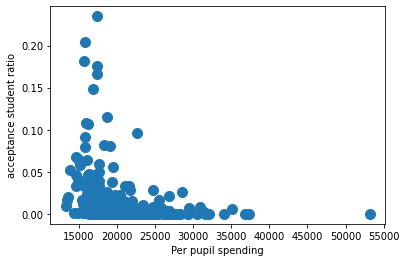

In [57]:
plt.plot(ms_df['per_pupil_spending'],ms_df['acceptance_student_ratio'],'o',markersize=10)
plt.xlabel('Per pupil spending')
plt.ylabel('acceptance student ratio')

In [58]:
model = ols("acceptance_student_ratio ~ per_pupil_spending ", data=ms_df).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     acceptance_student_ratio   R-squared:                       0.085
Model:                                  OLS   Adj. R-squared:                  0.083
Method:                       Least Squares   F-statistic:                     43.40
Date:                      Thu, 22 Jul 2021   Prob (F-statistic):           1.20e-10
Time:                              10:57:34   Log-Likelihood:                 1071.8
No. Observations:                       471   AIC:                            -2140.
Df Residuals:                           469   BIC:                            -2131.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Text(0, 0.5, 'acceptance student ratio')

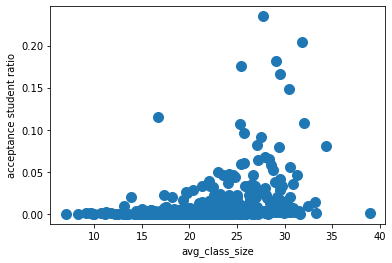

In [59]:
plt.plot(ms_df['avg_class_size'],ms_df['acceptance_student_ratio'],'o',markersize=10)
plt.xlabel('avg_class_size')
plt.ylabel('acceptance student ratio')

In [60]:
model = ols("acceptance_student_ratio ~ avg_class_size ", data=ms_df).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     acceptance_student_ratio   R-squared:                       0.121
Model:                                  OLS   Adj. R-squared:                  0.119
Method:                       Least Squares   F-statistic:                     64.57
Date:                      Thu, 22 Jul 2021   Prob (F-statistic):           7.62e-15
Time:                              10:57:34   Log-Likelihood:                 1081.4
No. Observations:                       471   AIC:                            -2159.
Df Residuals:                           469   BIC:                            -2150.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

# Q7 Proportion of schools that account for 90% of acceptances

In [61]:
lst = list(ms_df["acceptances"])

In [62]:
su = sum(lst)
su

4461

In [63]:
sor = sorted(lst, reverse=True)
#print(sor)
numSchools = 0
partialSum = 0
for i in range(len(sor)):
    partialSum += sor[i]
    numSchools += 1
    if partialSum/su >= 0.9:
        break
print(numSchools)
numSchools/594

123


0.20707070707070707

# Q8 Ridge model

In [64]:
from numpy import arange
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [65]:
ms_df.columns

Index(['dbn', 'school_name', 'applications', 'acceptances',
       'per_pupil_spending', 'avg_class_size', 'asian_percent',
       'black_percent', 'hispanic_percent', 'multiple_percent',
       'white_percent', 'rigorous_instruction', 'collaborative_teachers',
       'supportive_environment', 'effective_school_leadership',
       'strong_family_community_ties', 'trust', 'disability_percent',
       'poverty_percent', 'ESL_percent', 'school_size', 'student_achievement',
       'reading_scores_exceed', 'math_scores_exceed', 'application_rate',
       'acceptance_student_ratio', 'acceptance_rate'],
      dtype='object')

In [66]:
ms_df3 = ms_df
zscoredData['perception_school'] = rotatedData1[:,0]
zscoredData['objective_achievement'] = rotatedData2[:,0]
zscoredData.describe()

,applications,acceptances,per_pupil_spending,avg_class_size,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,acceptance_student_ratio,perception_school,objective_achievement
count,594.000000,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,594.000000,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02
mean,0.000000,-4.784800e-17,-1.555060e-16,-1.794300e-16,6.579099e-17,-6.010904e-16,-5.801569e-16,2.691450e-17,3.050310e-16,-3.289550e-16,-1.435440e-16,-2.990500e-16,-8.373399e-17,0.000000,-1.136390e-16,4.784800e-17,-2.392400e-17,-2.392400e-17,1.794300e-17,-4.784800e-17
std,1.000843,1.000843e+00,8.931064e-01,8.931064e-01,9.639366e-01,9.639366e-01,9.639366e-01,9.639366e-01,9.621855e-01,9.621855e-01,9.991565e-01,9.991565e-01,9.991565e-01,0.999156,9.604313e-01,9.940803e-01,9.940803e-01,9.991565e-01,1.877323e+00,1.461435e+00
min,-0.714388,-3.554510e-01,-1.922937e+00,-3.091017e+00,-2.759766e+00,-4.020935e+00,-3.302270e+00,-3.734130e+00,-3.135505e+00,-4.254894e+00,-2.635794e+00,-3.671388e+00,-1.049248e+00,-1.571575,-2.831287e+00,-1.665761e+00,-1.218679e+00,-3.824514e-01,-6.750003e+00,-2.796056e+00
25%,-0.530246,-3.554510e-01,-4.985766e-01,-5.016701e-01,-5.443586e-01,-5.446219e-01,-5.886256e-01,-4.892292e-01,-5.663654e-01,-5.439634e-01,-6.469659e-01,-2.770268e-01,-6.956288e-01,-0.759655,-6.286033e-01,-8.222647e-01,-8.983725e-01,-3.824514e-01,-1.140656e+00,-1.213259e+00
50%,-0.329364,-3.081213e-01,-1.502205e-16,-1.802645e-16,7.092532e-17,-5.996413e-16,-5.609548e-16,2.901490e-17,3.297326e-02,2.037176e-02,-6.637635e-02,2.661770e-01,-2.558716e-01,-0.223708,-1.104134e-16,-1.369242e-01,-2.120019e-01,-2.847701e-01,6.458613e-02,-2.287193e-01
75%,-0.011301,-2.607915e-01,3.210821e-01,4.463449e-01,6.710387e-01,7.140430e-01,7.334064e-01,6.253057e-01,6.666689e-01,6.189090e-01,5.512721e-01,6.888160e-01,3.901636e-01,0.450893,7.072177e-01,7.065719e-01,7.489170e-01,-1.300292e-01,1.290255e+00,1.081806e+00
max,5.881239,9.347142e+00,8.332613e+00,3.528040e+00,1.978745e+00,1.867819e+00,2.281575e+00,2.336178e+00,2.208916e+00,2.397420e+00,9.717176e+00,1.151202e+00,8.017912e+00,4.307846,2.256202e+00,2.288127e+00,2.213174e+00,9.612679e+00,4.397453e+00,3.622023e+00


In [79]:
test_cols = ['applications', 'per_pupil_spending', 'avg_class_size', 'rigorous_instruction', 'collaborative_teachers', 'supportive_environment', 'effective_school_leadership', 'strong_family_community_ties', 'trust', 'disability_percent', 'poverty_percent', 'ESL_percent', 'school_size', 'student_achievement', 'reading_scores_exceed', 'math_scores_exceed']
X = zscoredData[test_cols]
#X2 = zscoredData[['applications', 'per_pupil_spending', 'avg_class_size', 'rigorous_instruction', 'collaborative_teachers', 'supportive_environment', 'effective_school_leadership', 'strong_family_community_ties', 'trust', 'disability_percent', 'poverty_percent', 'ESL_percent', 'school_size']]
y = zscoredData["acceptance_student_ratio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [80]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=arange(0, 1, .01), cv=cv, scoring='neg_mean_absolute_error')
model.fit(X, y)
#display lambda that produced the lowest test MSE
print(model.alpha_)

0.99


In [83]:
ridge = Ridge(alpha=model.alpha_)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test), ridge.score(X_train, y_train)

(0.5241924730666004, 0.5919324782220344)

In [85]:
for elem in sorted(zip(ridge.coef_, test_cols)):
    print(elem)

(-0.4009625322026706, 'school_size')
(-0.30927356295429054, 'poverty_percent')
(-0.26100981935806566, 'reading_scores_exceed')
(-0.07757936265376972, 'rigorous_instruction')
(-0.0730381303607597, 'per_pupil_spending')
(-0.043742979818497785, 'effective_school_leadership')
(-0.016623104548086565, 'strong_family_community_ties')
(0.015171217180755706, 'disability_percent')
(0.021195181825035308, 'ESL_percent')
(0.032053091193872285, 'collaborative_teachers')
(0.03318283080072419, 'student_achievement')
(0.03438654417662379, 'trust')
(0.07416052560182704, 'supportive_environment')
(0.08515184224341184, 'avg_class_size')
(0.3149470537316542, 'math_scores_exceed')
(0.6845280814300269, 'applications')
